In [2]:
import gurobipy as gp
from gurobipy import Model, GRB, quicksum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
distance_i_j = pd.read_csv("distance_i_j.csv")
distance_j_k = pd.read_csv("distance_j_k.csv")
demand = pd.read_csv("demand.csv")
j_data = pd.read_csv("j_data.csv")
k_data = pd.read_csv("k_data.csv")

In [4]:
num_of_customer = len(demand)

In [35]:
I = {i for i in range(0, num_of_customer)}
J = {j for j in range(0, num_of_customer)}
K = {k for k in range(0, len(k_data))}
L = {l for l in range(0,5)}

Q = [(i,j,l) for i in I for j in J for l in L]
P = [(j,k,l) for j in J for k in K for l in L]

Y = {(i,j,l) for i in I for j in J for l in L}
Z = {(j,k,l) for j in J for k in K for l in L}

In [6]:
h = {(i,l): demand.iat[i,l] for i in I for l in L}
v = j_data['capac_J'].tolist()
b = k_data['capac_K'].tolist()

#Assume that each unit of each product takes 1 unit of capacity
s = [1]*5

f = j_data['fixed_cost_J'].tolist()
g = k_data['fixed_cost_K'].tolist()

c = {(i,j,l): distance_i_j.iat[i,j]*0.5 for i in range(0,len(distance_i_j)) for j in J for l in L}

d = {(i,j,l): distance_j_k.iat[i,j]*0.25 for i in range(0,len(distance_j_k)) for j in range(0,10) for l in L}

In [7]:
mdl = Model('UFLP')

Academic license - for non-commercial use only - expires 2022-08-28
Using license file C:\Users\HP\gurobi.lic


In [42]:
x = mdl.addVars(J, vtype = GRB.BINARY)
z = mdl.addVars(K, vtype = GRB.BINARY)
#y = mdl.addVars(Y, vtype = GRB.INTEGER)
#z = mdl.addVars(Z, vtype = GRB.INTEGER)

In [43]:
y = {(i,j,l): demand.iat[i,l] for i in I for j in J for l in L}
w = {(j,k,l): demand.iat[j,l] for j in J for k in K for l in L}

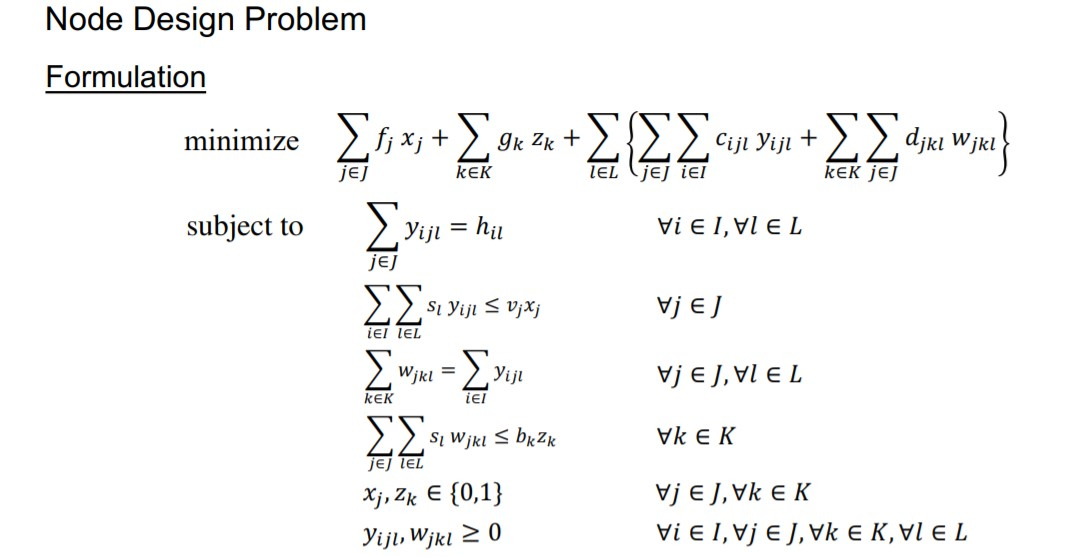

In [44]:
from IPython.display import Image
Image('obj.jpg')

In [45]:
mdl.setObjective(quicksum(f[j]*x[j] for j in J) + quicksum(g[k]*z[k] for k in K) + quicksum(quicksum(quicksum(c[i,j,l]*y[i,j,l] for i in I)for j in J) + quicksum(quicksum(d[j,k,l]*w[j,k,l] for j in J) for k in K) for l in L),GRB.MINIMIZE)

In [46]:
mdl.addConstrs(quicksum(y[i,j,l] for j in J) == h[i,l] for i in I for l in L)
mdl.addConstrs(quicksum(s[l]*y[i,j,l] for l in L for i in I) <= v[j]*x[j] for j in J)
mdl.addConstrs(quicksum(w[j,k,l] for k in K) == quicksum(y[i,j,l] for i in I) for j in J for l in L)
mdl.addConstrs(quicksum(s[l]*w[j,k,l] for l in L for j in J) <= b[k]*z[k] for k in K)

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>}

In [47]:
mdl.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 4890 rows, 86828 columns and 490 nonzeros
Model fingerprint: 0x1ace7f33
Variable types: 0 continuous, 86828 integer (588 binary)
Coefficient statistics:
  Matrix range     [2e+03, 1e+04]
  Objective range  [3e+04, 1e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 6e+04]
Presolve time: 0.02s

Explored 0 nodes (0 simplex iterations) in 0.06 seconds
Thread count was 1 (of 4 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -


In [22]:
sol_x={j: x[j] for j in J}
sol_x

{0: <gurobi.Var C98>,
 1: <gurobi.Var C99>,
 2: <gurobi.Var C100>,
 3: <gurobi.Var C101>,
 4: <gurobi.Var C102>,
 5: <gurobi.Var C103>,
 6: <gurobi.Var C104>,
 7: <gurobi.Var C105>,
 8: <gurobi.Var C106>,
 9: <gurobi.Var C107>,
 10: <gurobi.Var C108>,
 11: <gurobi.Var C109>,
 12: <gurobi.Var C110>,
 13: <gurobi.Var C111>,
 14: <gurobi.Var C112>,
 15: <gurobi.Var C113>,
 16: <gurobi.Var C114>,
 17: <gurobi.Var C115>,
 18: <gurobi.Var C116>,
 19: <gurobi.Var C117>,
 20: <gurobi.Var C118>,
 21: <gurobi.Var C119>,
 22: <gurobi.Var C120>,
 23: <gurobi.Var C121>,
 24: <gurobi.Var C122>,
 25: <gurobi.Var C123>,
 26: <gurobi.Var C124>,
 27: <gurobi.Var C125>,
 28: <gurobi.Var C126>,
 29: <gurobi.Var C127>,
 30: <gurobi.Var C128>,
 31: <gurobi.Var C129>,
 32: <gurobi.Var C130>,
 33: <gurobi.Var C131>,
 34: <gurobi.Var C132>,
 35: <gurobi.Var C133>,
 36: <gurobi.Var C134>,
 37: <gurobi.Var C135>,
 38: <gurobi.Var C136>,
 39: <gurobi.Var C137>,
 40: <gurobi.Var C138>,
 41: <gurobi.Var C139>,
 42:

In [48]:
sol_z={k: z[k] for k in K}
sol_z

{0: <gurobi.Var C88>,
 1: <gurobi.Var C89>,
 2: <gurobi.Var C90>,
 3: <gurobi.Var C91>,
 4: <gurobi.Var C92>,
 5: <gurobi.Var C93>,
 6: <gurobi.Var C94>,
 7: <gurobi.Var C95>,
 8: <gurobi.Var C96>,
 9: <gurobi.Var C97>}

#### Tried Multiple ways but kept getting no feasible solution. I have followed the same objective function as the one in image attached above